In [2]:
import os
import cv2
import mediapipe as mp
import pandas as pd
from tqdm import tqdm

# Setup MediaPipe
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Base path to dataset
train_dir = r'C:\Users\Nitish Paramanik\Desktop\MLLab\LieDetectionDataset\Train'

# Output data list
data = []

# Walk through 'Lie' and 'Truth' folders
for label_name in ['Lie', 'Truth']:
    label = 1 if label_name == 'Lie' else 0
    folder_path = os.path.join(train_dir, label_name)

    # Traverse all people and question folders
    for person in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person)
        if not os.path.isdir(person_path):
            continue

        for question in os.listdir(person_path):
            question_path = os.path.join(person_path, question)
            if not os.path.isdir(question_path):
                continue

            for img_file in tqdm(os.listdir(question_path), desc=f"{label_name}/{person}/{question}"):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(question_path, img_file)
                    image = cv2.imread(img_path)
                    if image is None:
                        continue
                    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    results = face_mesh.process(rgb_img)
                    if results.multi_face_landmarks:
                        for face_landmarks in results.multi_face_landmarks:
                            row = []
                            for lm in face_landmarks.landmark:
                                row.extend([lm.x, lm.y, lm.z])
                            row.append(label)
                            row.append(img_path)  # Optionally store image path
                            data.append(row)
                    else:
                        print(f"No face detected in: {img_path}")

# Create CSV
columns = [f'{axis}_{i}' for i in range(468) for axis in ['x', 'y', 'z']] + ['label', 'image_path']
df = pd.DataFrame(data, columns=columns)
df.to_csv('train_landmarks.csv', index=False)
print("Saved train_landmarks.csv ✅")

Lie/Dishant/What is your Hobby: 100%|████████████████████████████████████████████████| 166/166 [00:04<00:00, 40.51it/s]
Lie/Dishant/You are a Morning person or Night Owl: 100%|█████████████████████████████| 141/141 [00:03<00:00, 40.54it/s]
Lie/Dishant/Your Favorite Bollywood actor and Actress Name: 100%|████████████████████| 481/481 [00:13<00:00, 35.08it/s]
Lie/DrPrashant/What is your Hobby: 100%|█████████████████████████████████████████████| 131/131 [00:03<00:00, 35.49it/s]
Lie/DrPrashant/You are a Morning person or Night Owl: 100%|██████████████████████████| 171/171 [00:05<00:00, 33.87it/s]
Lie/DrPrashant/Your Favorite Bollywood actor and Actress Name: 100%|█████████████████| 601/601 [00:15<00:00, 38.67it/s]
Lie/Harsha/You are a Morning person or Night Owl: 100%|██████████████████████████████| 231/231 [00:06<00:00, 34.54it/s]
Lie/Harsha/Your Favorite Bollywood actor and Actress Name: 100%|█████████████████████| 511/511 [00:15<00:00, 32.80it/s]
Lie/Mansi/You are a Morning person or Ni

Saved train_landmarks.csv ✅


In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv('train_landmarks.csv')

# Show shape of the dataset
print(f"Dataset shape: {df.shape}")  # Rows, Columns

# Show first 2 rows
print("\nSample data:")
print(df.head(2).T)  # Transposed for better viewing

# Check if any NaN values exist
print("\nMissing values:", df.isnull().sum().sum())

Dataset shape: (17634, 1406)

Sample data:
                                                            0  \
x_0                                                  0.503519   
y_0                                                  0.647409   
z_0                                                 -0.048365   
x_1                                                  0.509508   
y_1                                                  0.583253   
...                                                       ...   
x_467                                                 0.65571   
y_467                                                0.462486   
z_467                                                0.024563   
label                                                       1   
image_path  C:\Users\Nitish Paramanik\Desktop\MLLab\LieDet...   

                                                            1  
x_0                                                  0.503236  
y_0                                             

# Summary of Your CSV
Rows: 17634 → Number of images successfully processed.

Columns: 1406 → Which means:

468 landmark points × 3 coordinates (x, y, z) = 1404

Plus label and image_path → total 1406 columns

Missing values: 0 → 🎉 All landmark data was extracted successfully!

Label: Present → You’ve tagged each row as 1 (Lie) or 0 (Truth) ✔️

Image path: Also saved for traceability ✔️

In [4]:
import os
import pandas as pd
import mediapipe as mp
import cv2
from tqdm import tqdm

def extract_landmarks_from_folder(base_path):
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)
    data = []

    for label_folder in ['Lie', 'Truth']:
        label_value = 1 if label_folder == 'Lie' else 0
        label_path = os.path.join(base_path, label_folder)

        for person in os.listdir(label_path):
            person_path = os.path.join(label_path, person)
            if not os.path.isdir(person_path):
                continue
            for question in os.listdir(person_path):
                question_path = os.path.join(person_path, question)
                if not os.path.isdir(question_path):
                    continue
                for image_file in tqdm(os.listdir(question_path), desc=f"{label_folder}/{person}/{question}"):
                    if image_file.lower().endswith(('jpg', 'jpeg', 'png')):
                        image_path = os.path.join(question_path, image_file)
                        image = cv2.imread(image_path)
                        if image is None:
                            continue
                        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        results = mp_face_mesh.process(image_rgb)
                        if results.multi_face_landmarks:
                            landmarks = results.multi_face_landmarks[0]
                            row = []
                            for lm in landmarks.landmark:
                                row.extend([lm.x, lm.y, lm.z])
                            row.append(label_value)
                            row.append(image_path)
                            data.append(row)

    mp_face_mesh.close()

    # Create column names
    num_landmarks = 468
    columns = []
    for i in range(num_landmarks):
        columns += [f'x_{i}', f'y_{i}', f'z_{i}']
    columns += ['label', 'image_path']

    df = pd.DataFrame(data, columns=columns)
    return df

# Run for test data
test_base_path = r'C:\Users\Nitish Paramanik\Desktop\MLLab\LieDetectionDataset\Test'
test_df = extract_landmarks_from_folder(test_base_path)

# Save to CSV
test_df.to_csv("test_landmark_data.csv", index=False)
print("✅ Test landmark CSV saved successfully!")

Truth/Sailja/What is your Profession: 100%|██████████████████████████████████████████| 151/151 [00:04<00:00, 33.76it/s]


✅ Test landmark CSV saved successfully!


In [5]:
import pandas as pd

# Load the saved test CSV
test_df = pd.read_csv("test_landmark_data.csv")

# Print basic info
print("✅ Dataset shape:", test_df.shape)
print("\n📌 Sample data:")
print(test_df.head(10).T)  # Transpose for better readability

# Check for missing values
print("\n🚨 Missing values:", test_df.isnull().sum().sum())

✅ Dataset shape: (5838, 1406)

📌 Sample data:
                                                            0  \
x_0                                                  0.473386   
y_0                                                  0.567205   
z_0                                                   -0.0628   
x_1                                                  0.474107   
y_1                                                  0.502439   
...                                                       ...   
x_467                                                0.617049   
y_467                                                0.403854   
z_467                                                 0.03414   
label                                                       1   
image_path  C:\Users\Nitish Paramanik\Desktop\MLLab\LieDet...   

                                                            1  \
x_0                                                  0.471177   
y_0                                        

# Testing Diffrent appraoch

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
df = pd.read_csv("train_landmarks.csv")

# Drop image_path
df = df.drop(columns=['image_path'])

# Separate X and y
X = df.drop(columns=['label'])
y = df['label']

# Split for validation (e.g. 80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Try Logistic Regression First

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1457  395]
 [ 425 1250]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1852
           1       0.76      0.75      0.75      1675

    accuracy                           0.77      3527
   macro avg       0.77      0.77      0.77      3527
weighted avg       0.77      0.77      0.77      3527



C:\Users\Nitish Paramanik\Desktop\MLLab\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 76.75%


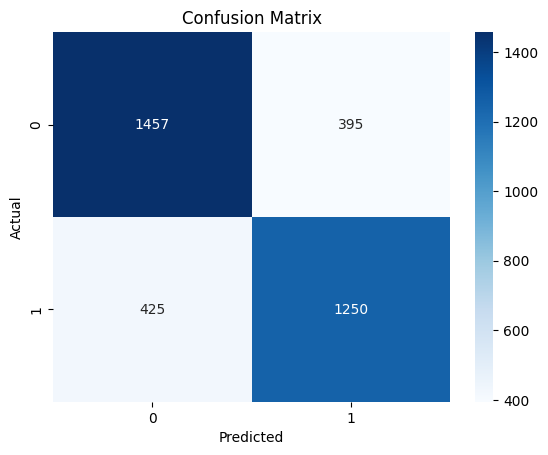


📊 Classification Report:
              precision    recall  f1-score   support

       Truth       0.77      0.79      0.78      1852
         Lie       0.76      0.75      0.75      1675

    accuracy                           0.77      3527
   macro avg       0.77      0.77      0.77      3527
weighted avg       0.77      0.77      0.77      3527



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation/test data
y_pred = model.predict(X_val_scaled)

# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_val, y_pred, target_names=["Truth", "Lie"]))

Press 'c' to capture the image
Image captured!
Raw Features (Before Scaling): [[ 0.55114621  0.54619509 -0.04129189 ...  0.64071143  0.42590997
   0.03411055]]
Scaled Features: [[ 1.54249054 -1.59668467  1.79208336 ... -0.17121657  0.13410707
   0.08861271]]
Prediction: Lie


C:\Users\Nitish Paramanik\Desktop\MLLab\ml-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


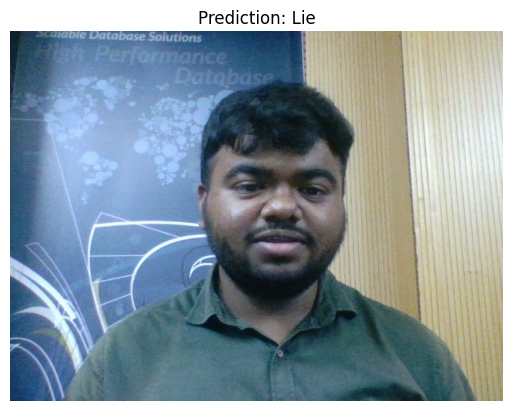

In [45]:
import cv2
import mediapipe as mp
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def capture_image_from_webcam():
    # Setup webcam (0 is typically the default camera)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to access the camera.")
        return None

    print("Press 'c' to capture the image")

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Show live webcam feed
        cv2.imshow('Webcam Feed', frame)

        # Wait for 'c' key to capture image
        if cv2.waitKey(1) & 0xFF == ord('c'):
            print("Image captured!")
            # Save captured image
            captured_image_path = 'captured_image.jpg'
            cv2.imwrite(captured_image_path, frame)
            cap.release()
            cv2.destroyAllWindows()
            return captured_image_path
    
    cap.release()
    cv2.destroyAllWindows()
    return None

def predict_lie_or_truth(image_path, model, scaler):
    # Setup MediaPipe FaceMesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
    
    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Unable to load image.")
        return
    
    # Convert image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to extract landmarks
    results = face_mesh.process(rgb_image)
    
    # Check if face landmarks were found
    if not results.multi_face_landmarks:
        print("Error: No face detected.")
        return
    
    # Extract the landmarks for the first face
    landmarks = results.multi_face_landmarks[0]
    
    # Prepare the feature vector (flattened list of x, y, z coordinates)
    features = []
    for lm in landmarks.landmark:
        features.extend([lm.x, lm.y, lm.z])
    
    # Convert to numpy array for compatibility with scaler
    features = np.array(features).reshape(1, -1)

    # Debugging: Check features before scaling
    print("Raw Features (Before Scaling):", features)
    
    # Scale the features using the same scaler from training
    features_scaled = scaler.transform(features)

    # Debugging: Check features after scaling
    print("Scaled Features:", features_scaled)
    
    # Make prediction using the trained model
    prediction = model.predict(features_scaled)
    
    # Display the result
    if prediction == 1:
        print("Prediction: Lie")
    else:
        print("Prediction: Truth")
    
    # Show the image with the prediction label
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {'Lie' if prediction == 1 else 'Truth'}")
    plt.axis('off')
    plt.show()

# Run the webcam capture and prediction
captured_image_path = capture_image_from_webcam()

if captured_image_path:
    predict_lie_or_truth(captured_image_path, model, scaler)

# Save the Model 

In [ ]:
import joblib

# Assuming 'model' is the Logistic Regression model you trained
joblib.dump(model, 'logistic_model.pkl')

print("Logistic Regression model saved as 'logistic_model.pkl'")